In [1]:
# Import packages
import pandas as pd
import numpy as np

# Set matplotlib as inline
%matplotlib inline  

## Create Population Data From Non-Normal Distribution

In [59]:
# Create an empty dataframe
population = pd.DataFrame()

# Create an column that is 10000 random numbers drawn from a uniform distribution
population['numbers'] = np.random.uniform(1,10,size=10000)

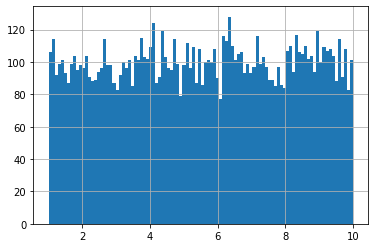

In [60]:
# Plot a histogram of the score data.
# This confirms the data is not a normal distribution.
population['numbers'].hist(bins=100)

## View the True Mean Of Population

In [61]:
# View the mean of the numbers
population['numbers'].mean()

5.533336104939104

## Take A Sample Mean, Repeat 1000 Times

In [62]:
# Create a list
sampled_means = []

# For 1000  times,
for i in range(0,1000):
    # Take a random sdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXAAAAD4CAYAAAD1jb0+AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAASBUlEQVR4nO3df4wcZ33H8fe3JkDkAztpwso1CKdVhBrFxeBTGhQJ3RGg5oeaIBWJSKWOAB1/AELCqDUglSCElFYNVFUrVCBp3BY4IUiaKFBay80RISHSMzhcUhOFHy7ESe2mBJOLIpCTb/+4sdmcd29n73Zu57HfL2l1u8/Ozn52tP54bvbZuchMJEnl+Y1xB5AkrY4FLkmFssAlqVAWuCQVygKXpEI9Zz2f7KKLLspt27Y1su4nn3ySjRs3NrLuppWavdTcYPZxKDU3jD/7wYMHH8vMi5ePr2uBb9u2jfn5+UbWPTc3x9TUVCPrblqp2UvNDWYfh1Jzw/izR8R/9xr3EIokFcoCl6RCWeCSVCgLXJIKZYFLUqEscEkqlAUuSYWywCWpUBa4JBVqXb+JKY3Ctr1fPX39yI1vGmMSabzcA5ekQlngklQoC1ySCmWBS1KhLHBJKpQFLkmFssAlqVAWuCQVygKXpEJZ4JJUKAtckgplgUtSoSxwSSqUBS5JhRpY4BHx/Ii4NyLui4gHIuJj1fiFEbE/Ih6qfl7QfFxJ0il19sB/CbwmM18O7AB2RcSVwF7gQGZeChyobkuS1snAAs8li9XN86pLAtcA+6rxfcC1jSSUJPVU6xh4RGyIiEPAcWB/Zn4b6GTmowDVzxc1F1OStFxkZv2FIzYDtwPvA76ZmZu77ns8M884Dh4RM8AMQKfT2Tk7O7vm0L0sLi4yMTHRyLqbVmr2ceVeOHri9PXtWzetah2lbnMoN3upuWH82aenpw9m5uQZd2TmUBfgo8AHgQeBLdXYFuDBQY/duXNnNuXuu+9ubN1NKzX7uHK/9M/uOn1ZrVK3eWa52UvNnTn+7MB89ujUOrNQLq72vImI84HXAt8H7gR2V4vtBu5Y6/8ykqT66vxV+i3AvojYwNIx8y9l5l0R8S3gSxHxTuAnwFsbzClJWmZggWfm94BX9Bj/P+DqJkJJkgbzm5iSVCgLXJIKZYFLUqEscEkqlAUuSYWywCWpUBa4JBXKApekQlngklQoC1ySCmWBS1KhLHBJKpQFLkmFqnM6WalR2/Z+9fT1Ize+aYxJhtOdu1tJr0Flcw9ckgplgUtSoSxwSSqUBS5JhbLAJalQFrgkFcpphGqVUqcUSuPgHrgkFcoCl6RCDSzwiHhJRNwdEYcj4oGIeH81fkNEHI2IQ9Xljc3HlSSdUucY+ElgT2Z+JyJeAByMiP3VfZ/KzL9qLp4kqZ+BBZ6ZjwKPVtefiIjDwNamg0mSVhaZWX/hiG3APcDlwAeA64FfAPMs7aU/3uMxM8AMQKfT2Tk7O7vWzD0tLi4yMTHRyLqbVmr2UeVeOHpi4DLbt27quXz3+DAWFxf58YmnBz7XSvrlHjbTsK/nXH+/jMO4s09PTx/MzMnl47ULPCImgG8An8jM2yKiAzwGJPBxYEtmvmOldUxOTub8/PzQ4euYm5tjamqqkXU3rdTso8rd76x+3bqnFI5iquHc3BzXf/3Jgc+1klGdjXDY13Ouv1/GYdzZI6JngdeahRIR5wFfAT6fmbcBZOaxzHw6M58BPgtcMcrAkqSV1ZmFEsDNwOHM/GTX+Jauxd4C3D/6eJKkfurMQrkKeDuwEBGHqrEPA9dFxA6WDqEcAd7dSEJJUk91ZqF8E4ged31t9HEkSXV5LhSd9Ty/is5WfpVekgplgUtSoSxwSSqUBS5JhbLAJalQzkJREep83f5sm21ytr0ejZ574JJUKAtckgplgUtSoSxwSSqUBS5JhbLAJalQTiPUyK3n9Lc60wvbqNTcahf3wCWpUBa4JBXKApekQlngklQoC1ySCuUsFGnEPAmV1ot74JJUKAtckgo1sMAj4iURcXdEHI6IByLi/dX4hRGxPyIeqn5e0HxcSdIpdfbATwJ7MvN3gSuB90TEZcBe4EBmXgocqG5LktbJwALPzEcz8zvV9SeAw8BW4BpgX7XYPuDapkJKks4UmVl/4YhtwD3A5cBPMnNz132PZ+YZh1EiYgaYAeh0OjtnZ2fXGLm3xcVFJiYmGll300rN3i/3wtETPZffvnVTz/F+y69F93P1Wn/nfDj21HCPXZ6/Tu5hX/Og3ACXbNpwVr1fSjDu7NPT0wczc3L5eO0Cj4gJ4BvAJzLztoj4eZ0C7zY5OZnz8/NDRq9nbm6OqampRtbdtFKz98vd70RN/abUNXFip+7n6rX+PdtPctNC71m0/R67PH+d3MO+5kG5AW7dtfGser+UYNzZI6JngdeahRIR5wFfAT6fmbdVw8ciYkt1/xbg+KjCSpIGqzMLJYCbgcOZ+cmuu+4EdlfXdwN3jD6eJKmfOt/EvAp4O7AQEYeqsQ8DNwJfioh3Aj8B3tpMRElSLwMLPDO/CUSfu68ebRxJUl1+E1OSCuXJrDQWTf9JsSbW759BU9u4By5JhbLAJalQFrgkFcoCl6RCWeCSVChnoWgo3TMxbt21cYxJmuNsE5XCPXBJKpQFLkmFssAlqVAWuCQVygKXpEI5C0WrtnD0BNdXMzb6/eWZc91Kf9FHWiv3wCWpUBa4JBXKApekQlngklQoC1ySCuUsFAErn//D2RNSO7kHLkmFssAlqVAWuCQVamCBR8QtEXE8Iu7vGrshIo5GxKHq8sZmY0qSlquzB34rsKvH+Kcyc0d1+dpoY0mSBhlY4Jl5D/CzdcgiSRpCZObghSK2AXdl5uXV7RuA64FfAPPAnsx8vM9jZ4AZgE6ns3N2dnYEsc+0uLjIxMREI+tuWhuyLxw90fe+7Vs39Vyucz4ce2rlZeqsZxy6s6+XUW2jSzZtGPv7ZTXa8D5frXFnn56ePpiZk8vHV1vgHeAxIIGPA1sy8x2D1jM5OZnz8/PDJa9pbm6OqampRtbdtDZkrzsPvHu5PdtPctPCc1Zcps56xqE7+3oZ1Ta6ddfGsb9fVqMN7/PVGnf2iOhZ4KuahZKZxzLz6cx8BvgscMVaA0qShrOqAo+ILV033wLc329ZSVIzBv4OGRFfBKaAiyLiYeCjwFRE7GDpEMoR4N0NZpQk9TCwwDPzuh7DNzeQRZI0BE9mpZEY94eSZ4tht2Od5T0Z2dnLr9JLUqEscEkqlAUuSYWywCWpUBa4JBXKWShSYRaOnuB6Z/0I98AlqVgWuCQVygKXpEJZ4JJUKAtckgrlLJRzTPe5MzxHhlQ298AlqVAWuCQVygKXpEJZ4JJUKAtckgplgUtSoZxGWKB+UwHbPkXwXP+za+f669fouQcuSYWywCWpUAMLPCJuiYjjEXF/19iFEbE/Ih6qfl7QbExJ0nJ19sBvBXYtG9sLHMjMS4ED1W1J0joaWOCZeQ/ws2XD1wD7quv7gGtHnEuSNEBk5uCFIrYBd2Xm5dXtn2fm5q77H8/MnodRImIGmAHodDo7Z2dnRxD7TIuLi0xMTDSy7qYNm33h6InT17dv3TRwfNjH1tU5H449NfTDWuFcyj7se6TbsMuv5Fz6Nzpq09PTBzNzcvl44wXebXJyMufn54fJXdvc3BxTU1ONrLtpw2ZfyzTCOo+ta8/2k9y0UOZM1HMp+1qmmo5yauq59G901CKiZ4GvdhbKsYjYUq14C3B8LeEkScNbbYHfCeyuru8G7hhNHElSXXWmEX4R+Bbwsoh4OCLeCdwIvC4iHgJeV92WJK2jgQfSMvO6PnddPeIskqQhlPkpjk7r9+Fj28+LovVT5wPqtXwArvHxq/SSVCgLXJIKZYFLUqEscEkqlAUuSYWywCWpUE4jPAf4p7zUS1PvC6cbrh/3wCWpUBa4JBXKApekQlngklQoC1ySCuUsFEmt4QyW4bgHLkmFssAlqVAWuCQVygKXpEJZ4JJUKGehNKzfp+rd47fu2riumSSdHdwDl6RCWeCSVKg1HUKJiCPAE8DTwMnMnBxFKEnSYKM4Bj6dmY+NYD2SpCF4CEWSChWZufoHR/wYeBxI4O8z8zM9lpkBZgA6nc7O2dnZVT/fShYXF5mYmGhk3d0Wjp44fX371k2rXr57/JJNG05nr7P+7mXGqXM+HHtq3ClWx+yjs/x92u/92Z27znu7zr+v9bJe/dLP9PT0wV6HqNda4L+VmY9ExIuA/cD7MvOefstPTk7m/Pz8qp9vJXNzc0xNTTWy7m7Dnmyn7jTCU9nrrL8tfyJtz/aT3LRQ5kxUs4/O8vdpv/dnd+467+02ncxqvfqln4joWeBrOoSSmY9UP48DtwNXrGV9kqT6Vl3gEbExIl5w6jrweuD+UQWTJK1sLb+HdYDbI+LUer6QmV8fSSpJ0kCrLvDM/BHw8hFmkSQNwWmEklSo9nyUrTO0ZbaJtJKm3qdtnZHSJu6BS1KhLHBJKpQFLkmFssAlqVAWuCQV6pyehbL803M/6Zbaz9kpv+YeuCQVygKXpEJZ4JJUKAtckgplgUtSoc7pWSgraeL8Dv3WuXD0BNd73hOprzr/HtdzdkpbZsK4By5JhbLAJalQFrgkFcoCl6RCWeCSVCgLXJIKVcw0wn7Tdk6N79l+8llT8Xots3y8qXySVjaqfy/Drqff8k30xXqcLM89cEkqlAUuSYVaU4FHxK6IeDAifhARe0cVSpI02KoLPCI2AH8HvAG4DLguIi4bVTBJ0srWsgd+BfCDzPxRZv4KmAWuGU0sSdIgkZmre2DEHwG7MvNd1e23A7+fme9dttwMMFPdfBnw4Orjrugi4LGG1t20UrOXmhvMPg6l5obxZ39pZl68fHAt0wijx9gZ/xtk5meAz6zheeqFiZjPzMmmn6cJpWYvNTeYfRxKzQ3tzb6WQygPAy/puv1i4JG1xZEk1bWWAv9P4NKIuCQingu8DbhzNLEkSYOs+hBKZp6MiPcC/wZsAG7JzAdGlmx4jR+maVCp2UvNDWYfh1JzQ0uzr/pDTEnSePlNTEkqlAUuSYVqbYFHxPMj4t6IuC8iHoiIj1XjN0TE0Yg4VF3e2PWYD1Vf638wIv6ga3xnRCxU9/1NRPSaAtnEa9gQEd+NiLuq2xdGxP6IeKj6eUEbs/fIXcQ2j4gj1XMeioj5aqyUbd4re+u3e0RsjogvR8T3I+JwRLyqoG3eK3vrt/mzZGYrLyzNM5+orp8HfBu4ErgB+GCP5S8D7gOeB1wC/BDYUN13L/Cqap3/CrxhnV7DB4AvAHdVt/8S2Ftd3wv8RRuz98hdxDYHjgAXLRsrZZv3yt767Q7sA95VXX8usLmgbd4re+u3efeltXvguWSxunledVnpE9drgNnM/GVm/hj4AXBFRGwBXpiZ38qlrf2PwLVNZgeIiBcDbwI+tyzjvur6vq4crcneJ3c/rck9IGOrt/kqtCJ7RLwQeDVwM0Bm/iozf04B23yF7P20Jnu31hY4nP5V/hBwHNifmd+u7npvRHwvIm7p+vVsK/DTroc/XI1tra4vH2/aXwN/CjzTNdbJzEcBqp8vqsbblL1Xbihjmyfw7xFxMJZO4QBlbHPonR3avd1/G/hf4B+qQ26fi4iNlLHN+2WHdm/zZ2l1gWfm05m5g6VveV4REZcDnwZ+B9gBPArcVC3e76v9tb7yP0oR8WbgeGYerPuQHmPrnn2F3K3f5pWrMvOVLJ0h8z0R8eoVli0he9u3+3OAVwKfzsxXAE+ydMikn7bkhv7Z277Nn6XVBX5K9avNHEsnzzpWFfszwGdZOisi9P9q/8PV9eXjTboK+MOIOMLSWRpfExH/DByrfuWi+nm8Wr4t2XvmLmSbk5mPVD+PA7dXOdu+zakyn5G9gO3+MPBw12/GX2apFEvY5j2zF7DNn6W1BR4RF0fE5ur6+cBrge+femNU3gLcX12/E3hbRDwvIi4BLgXurX6FeyIirqw+Hf4T4I4ms2fmhzLzxZm5jaVTDPxHZv5xlXF3tdjurhytyN4vdwnbPCI2RsQLTl0HXl/lbPU2Xyl727d7Zv4P8NOIeFk1dDXwXxSwzftlb/s2P8N6fVo67AX4PeC7wPeqjfjn1fg/AQvV+J3Alq7HfISlT4cfpOuTYGCyWscPgb+l+gbqOr2OKX49m+M3gQPAQ9XPC9uafVnu1m9zlo5p3lddHgA+Uso2XyF7Cdt9BzBfZfwX4IIStvkK2Vu/zbsvfpVekgrV2kMokqSVWeCSVCgLXJIKZYFLUqEscEkqlAUuSYWywCWpUP8PcnXNGx3qoJMAAAAASUVORK5CYII=ample of 100 rows from the population, take the mean of those rows, append to sampled_means
    sampled_means.append(population.sample(n=30).mean().values[0])

In [63]:
len(sampled_means)

1000

## Plot The Sample Means Of All 100 Samples

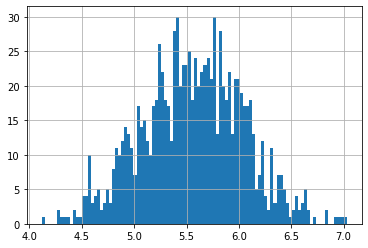

In [64]:
# Plot a histogram of sampled_means. 
# It is clearly normally distributed and centered around 5000
pd.Series(sampled_means).hist(bins=100)

#### This is the critical chart, remember that the population distribution was uniform, however, this distribution is approaching normality. This is the key point to the central limit theory, and the reason we can assume sample means are not bias.

## View The Mean Sample Mean

In [65]:
# View the mean of the sampled_means
pd.Series(sampled_means).mean()

5.559625018196839

## Compare To True Mean

In [66]:
# Subtract Mean Sample Mean From True Population Mean
error = population['numbers'].mean() - pd.Series(sampled_means).mean()

# Print
print('The Mean Sample Mean is only %f different the True Population mean!' % error)

The Mean Sample Mean is only -0.026289 different the True Population mean!
